### Covered concepts like Fault Tolerance, HITL, Short Term Memory, Time Travel 


In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()

llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [4]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [6]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

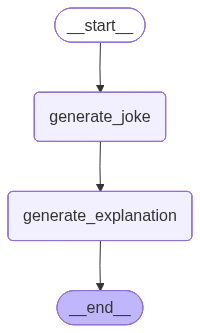

In [8]:
workflow

In [9]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza maker go broke?\n\nBecause he kneaded all his dough!',
 'explanation': 'This joke is a classic **pun**, playing on the double meaning of the word **"dough"**.\n\nHere\'s the breakdown:\n\n1.  **"Dough" (Meaning 1 - Literal):** In the context of a pizza maker, "dough" refers to the mixture of flour, water, and yeast that you knead (work with your hands) to make the pizza crust. A pizza maker literally kneads a lot of dough every day.\n\n2.  **"Dough" (Meaning 2 - Slang):** "Dough" is also a common slang term for **money**.\n\nThe joke works by setting up the expectation of a business failure ("Why did the pizza maker go broke?"). The punchline then uses the literal action of a pizza maker ("he kneaded all his dough") but intends for you to interpret "dough" in its slang meaning of "money."\n\nSo, the joke implies:\n*   He went broke because he literally spent/used up all his **money** (his "dough").\n*   It\'s a humorous twist because a piz

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza maker go broke?\n\nBecause he kneaded all his dough!', 'explanation': 'This joke is a classic **pun**, playing on the double meaning of the word **"dough"**.\n\nHere\'s the breakdown:\n\n1.  **"Dough" (Meaning 1 - Literal):** In the context of a pizza maker, "dough" refers to the mixture of flour, water, and yeast that you knead (work with your hands) to make the pizza crust. A pizza maker literally kneads a lot of dough every day.\n\n2.  **"Dough" (Meaning 2 - Slang):** "Dough" is also a common slang term for **money**.\n\nThe joke works by setting up the expectation of a business failure ("Why did the pizza maker go broke?"). The punchline then uses the literal action of a pizza maker ("he kneaded all his dough") but intends for you to interpret "dough" in its slang meaning of "money."\n\nSo, the joke implies:\n*   He went broke because he literally spent/used up all his **money** (his "dough").\n*   It\'s a humorous 

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza maker go broke?\n\nBecause he kneaded all his dough!', 'explanation': 'This joke is a classic **pun**, playing on the double meaning of the word **"dough"**.\n\nHere\'s the breakdown:\n\n1.  **"Dough" (Meaning 1 - Literal):** In the context of a pizza maker, "dough" refers to the mixture of flour, water, and yeast that you knead (work with your hands) to make the pizza crust. A pizza maker literally kneads a lot of dough every day.\n\n2.  **"Dough" (Meaning 2 - Slang):** "Dough" is also a common slang term for **money**.\n\nThe joke works by setting up the expectation of a business failure ("Why did the pizza maker go broke?"). The punchline then uses the literal action of a pizza maker ("he kneaded all his dough") but intends for you to interpret "dough" in its slang meaning of "money."\n\nSo, the joke implies:\n*   He went broke because he literally spent/used up all his **money** (his "dough").\n*   It\'s a humorous

In [12]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': "Why did the pasta get sent to the principal's office?\n\nBecause it was an **impasta**!",
 'explanation': 'This is a classic **pun** joke! Here\'s the breakdown:\n\n1.  **The Setup:** "Why did the pasta get sent to the principal\'s office?"\n    *   Getting sent to the principal\'s office implies someone did something wrong, was misbehaving, or was being deceitful.\n    *   The absurdity is that pasta is an inanimate food item and can\'t actually do any of these things. This immediately signals that the answer will be wordplay.\n\n2.  **The Punchline:** "Because it was an **impasta**!"\n\n3.  **The Pun:**\n    *   The word "**impasta**" sounds almost exactly like "**imposter**."\n    *   An **imposter** is someone who pretends to be someone else to deceive others, or someone who is not genuinely what they claim to be – essentially, a fake.\n\nSo, the joke works by:\n*   Playing on the sound-alike words "impasta" and "imposter."\n*   Creating a humorous, abs

In [13]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta get sent to the principal's office?\n\nBecause it was an **impasta**!", 'explanation': 'This is a classic **pun** joke! Here\'s the breakdown:\n\n1.  **The Setup:** "Why did the pasta get sent to the principal\'s office?"\n    *   Getting sent to the principal\'s office implies someone did something wrong, was misbehaving, or was being deceitful.\n    *   The absurdity is that pasta is an inanimate food item and can\'t actually do any of these things. This immediately signals that the answer will be wordplay.\n\n2.  **The Punchline:** "Because it was an **impasta**!"\n\n3.  **The Pun:**\n    *   The word "**impasta**" sounds almost exactly like "**imposter**."\n    *   An **imposter** is someone who pretends to be someone else to deceive others, or someone who is not genuinely what they claim to be – essentially, a fake.\n\nSo, the joke works by:\n*   Playing on the sound-alike words "impasta" and "imposter."\n*   Creat

In [14]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta get sent to the principal's office?\n\nBecause it was an **impasta**!", 'explanation': 'This is a classic **pun** joke! Here\'s the breakdown:\n\n1.  **The Setup:** "Why did the pasta get sent to the principal\'s office?"\n    *   Getting sent to the principal\'s office implies someone did something wrong, was misbehaving, or was being deceitful.\n    *   The absurdity is that pasta is an inanimate food item and can\'t actually do any of these things. This immediately signals that the answer will be wordplay.\n\n2.  **The Punchline:** "Because it was an **impasta**!"\n\n3.  **The Pun:**\n    *   The word "**impasta**" sounds almost exactly like "**imposter**."\n    *   An **imposter** is someone who pretends to be someone else to deceive others, or someone who is not genuinely what they claim to be – essentially, a fake.\n\nSo, the joke works by:\n*   Playing on the sound-alike words "impasta" and "imposter."\n*   Crea

### Time Travel

In [21]:
workflow.get_state({'configurable': {'thread_id': '1', 'checkpoint_id': '1f09204c-e71e-6307-8000-430d501edfa8'}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f09204c-e71e-6307-8000-430d501edfa8'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-15T07:22:58.957877+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f09204c-e70e-6d9e-bfff-951f6996a599'}}, tasks=(PregelTask(id='dab26620-eb52-9583-8fb9-729199d315fb', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the pizza maker go broke?\n\nBecause he kneaded all his dough!'}),), interrupts=())

In [22]:
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_id': '1f09204c-e71e-6307-8000-430d501edfa8'}})

{'topic': 'pizza',
 'joke': 'Why did the pizza chef break up with the cheese?\n\nHe said he just needed some **pizza** and quiet!',
 'explanation': 'This joke is a classic **pun**, playing on words that sound similar but have different meanings.\n\nHere\'s the breakdown:\n\n1.  **The Common Phrase:** When someone wants some alone time, relaxation, or a break from a stressful situation (like a breakup), they often say they need some "**peace and quiet**."\n2.  **The Wordplay:** The word "**pizza**" sounds almost exactly like "**peace**."\n3.  **The Context:** Since the character is a "pizza chef," it\'s a clever (and cheesy!) way to substitute "peace" with "pizza" in the familiar idiom.\n\nSo, instead of saying he needed "peace and quiet" after breaking up with the cheese, he says he needed "**pizza** and quiet," making a food-related joke out of a common sentiment. It\'s funny because it\'s unexpected, uses wordplay, and fits the character\'s profession perfectly!'}

In [23]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza chef break up with the cheese?\n\nHe said he just needed some **pizza** and quiet!', 'explanation': 'This joke is a classic **pun**, playing on words that sound similar but have different meanings.\n\nHere\'s the breakdown:\n\n1.  **The Common Phrase:** When someone wants some alone time, relaxation, or a break from a stressful situation (like a breakup), they often say they need some "**peace and quiet**."\n2.  **The Wordplay:** The word "**pizza**" sounds almost exactly like "**peace**."\n3.  **The Context:** Since the character is a "pizza chef," it\'s a clever (and cheesy!) way to substitute "peace" with "pizza" in the familiar idiom.\n\nSo, instead of saying he needed "peace and quiet" after breaking up with the cheese, he says he needed "**pizza** and quiet," making a food-related joke out of a common sentiment. It\'s funny because it\'s unexpected, uses wordplay, and fits the character\'s profession perfectly!'}

### Updating State

In [24]:
workflow.update_state({'configurable': {'thread_id': '1', 'checkpoint_id': '1f09204c-e71e-6307-8000-430d501edfa8', 'checkpoint_ns': ""}}, {'topic': 'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f092072-c84e-6a97-8001-0e0c32102045'}}

In [27]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Here are a few samosa jokes for you:\n\n1.  Why did the samosa get a promotion? Because it was outstanding in its **field** (of potatoes and peas)!\n\n2.  What's a samosa's favorite subject in school? **Tri-gonometry!**\n\n3.  Why did the samosa need therapy? It had too many **filling** issues.\n\n4.  I tried to make a joke about samosas, but it just wasn't very **filling**.\n\n5.  What do you call a samosa that tells jokes? A **spicy** comedian!", 'explanation': 'These samosa jokes are all examples of **puns** and **wordplay**, where words or phrases that sound alike or have multiple meanings are used in a humorous way.\n\nLet\'s break them down:\n\n1.  **Why did the samosa get a promotion? Because it was outstanding in its field (of potatoes and peas)!**\n    *   **The Joke:** This plays on the phrase "outstanding in its field."\n    *   **The Wordplay:**\n        *   **"Outstanding in its field" (common meaning):** Someone is except

In [26]:
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_id': '1f092072-c84e-6a97-8001-0e0c32102045'}})

{'topic': 'samosa',
 'joke': "Here are a few samosa jokes for you:\n\n1.  Why did the samosa get a promotion? Because it was outstanding in its **field** (of potatoes and peas)!\n\n2.  What's a samosa's favorite subject in school? **Tri-gonometry!**\n\n3.  Why did the samosa need therapy? It had too many **filling** issues.\n\n4.  I tried to make a joke about samosas, but it just wasn't very **filling**.\n\n5.  What do you call a samosa that tells jokes? A **spicy** comedian!",
 'explanation': 'These samosa jokes are all examples of **puns** and **wordplay**, where words or phrases that sound alike or have multiple meanings are used in a humorous way.\n\nLet\'s break them down:\n\n1.  **Why did the samosa get a promotion? Because it was outstanding in its field (of potatoes and peas)!**\n    *   **The Joke:** This plays on the phrase "outstanding in its field."\n    *   **The Wordplay:**\n        *   **"Outstanding in its field" (common meaning):** Someone is exceptionally good or high

### Fault Tolerance

In [38]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [39]:
# Define the state

class CrashState(TypedDict):

    input: str
    step1: str
    step2: str
    step3: str

In [40]:
# build states
#state1

def step1(state: CrashState) -> CrashState:
    
    print('step1 executed')
    return {'step1': 'done', 'input': state['input']}

In [41]:
#step2

def step2(state: CrashState)-> CrashState:

    print('step2 is running... now manually interrupt from the notebook toolbar (stop button)')
    time.sleep(30)
    return {'step2': 'done'}

In [42]:
# step3

def step3(state: CrashState) -> CrashState:

    print('step3 executed successfully')
    return{'step3': 'done'}

In [43]:

# Build the graph

builder = StateGraph(CrashState)

builder.add_node('step1', step1)
builder.add_node('step2', step2)
builder.add_node('step3', step3)


builder.add_edge(START, 'step1')
builder.add_edge('step1', 'step2')
builder.add_edge('step2', 'step3')
builder.add_edge('step3', END)

checkpointer = InMemorySaver()

graph = builder.compile(checkpointer=checkpointer)

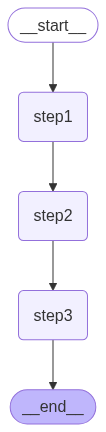

In [44]:
graph

In [45]:

try:
    print("Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated).")

Running graph: Please manually interrupt during Step 2...
step1 executed
step2 is running... now manually interrupt from the notebook toolbar (stop button)
Kernel manually interrupted (crash simulated).


In [46]:
graph.get_state({'configurable': {'thread_id': 'thread_1'}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': 'thread_1'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [47]:
list(graph.get_state_history({'configurable': {'thread_id': 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090985-b604-60a3-8001-b25938af8c85'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-13T11:54:09.094778+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090985-b5e4-66de-8000-7b16746167a4'}}, tasks=(PregelTask(id='ffd0a05a-3f62-5045-1006-2d0702076f7e', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090985-b5e4-66de-8000-7b16746167a4'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-13T11:54:09.081841+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkp

In [48]:
#Re-run to show fault-tolerant resume 

final_state = graph.invoke(None, config={'configurable': {'thread_id': 'thread-1'}})
print('\n Final state: ', final_state)

step2 is running... now manually interrupt from the notebook toolbar (stop button)
step3 executed successfully

 Final state:  {'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [49]:
graph.get_state({'configurable': {'thread_id': 'thread_1'}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': 'thread_1'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [50]:
list(graph.get_state_history({'configurable': {'thread_id': 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090996-0cb4-62e6-8003-92793387b6ce'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-09-13T12:01:27.681412+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090996-0ca3-6255-8002-3c24239ae385'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090996-0ca3-6255-8002-3c24239ae385'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-09-13T12:01:27.674399+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f090985-b604-60a3-8001-b25938af8c85'}}, tasks=(PregelTask(id='c2c8a500-e0ac-c27d-